File not found, using sample dataset...

Regression Error Metrics Comparison:
                    Model      MAE    MedAE     MAPE     RMSE       R2
        Linear Regression 1.182685 0.843018 0.131946 1.617034 0.928730
Support Vector Regression 1.215212 0.959498 0.122464 1.623750 0.928137


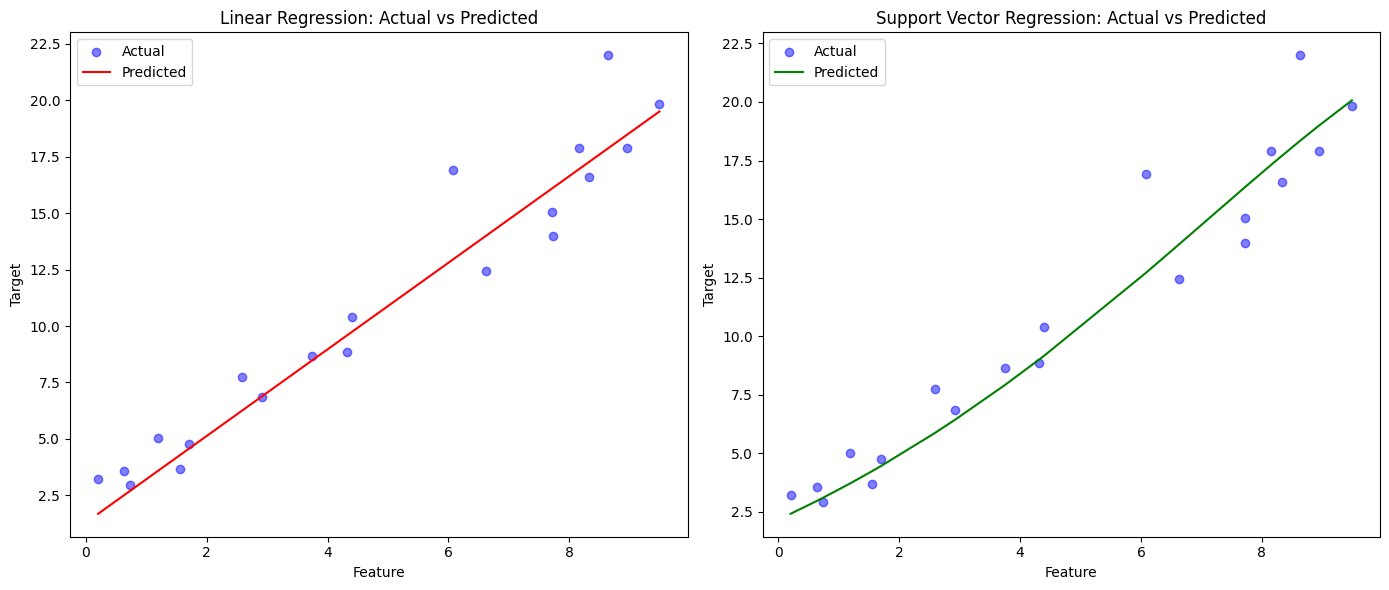

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        X, y = data.iloc[:, 0].values.reshape(-1, 1), data.iloc[:, -1].values
    except:
        print("File not found, using sample dataset...")
        np.random.seed(42)
        X = np.random.rand(100, 1) * 10
        y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2
    return X, y

def train_models(X_train, y_train):
    lr, svr = LinearRegression(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
    lr.fit(X_train, y_train)
    scaler = StandardScaler().fit(X_train)
    svr.fit(scaler.transform(X_train), y_train)
    return lr, svr, scaler

def evaluate(model, X, y, scaler=None):
    X = scaler.transform(X) if scaler else X
    y_pred = model.predict(X)
    return {"MAE": mean_absolute_error(y, y_pred), "MedAE": median_absolute_error(y, y_pred), 
            "MAPE": mean_absolute_percentage_error(y, y_pred), "RMSE": np.sqrt(mean_squared_error(y, y_pred)), 
            "R2": r2_score(y, y_pred)}, y_pred

def plot_results(X, y, y_pred_lr, y_pred_svr):
    idx = np.argsort(X.squeeze())
    plt.figure(figsize=(10, 5))
    plt.scatter(X[idx], y[idx], color='blue', alpha=0.5, label="Actual")
    plt.plot(X[idx], y_pred_lr[idx], color='red', label="Linear Regression")
    plt.plot(X[idx], y_pred_svr[idx], color='green', label="SVR")
    plt.legend(), plt.xlabel("Feature"), plt.ylabel("Target"), plt.title("Actual vs Predicted"), plt.show()

def main():
    X, y = load_data("regression_data.csv")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lr, svr, scaler = train_models(X_train, y_train)
    metrics_lr, y_pred_lr = evaluate(lr, X_test, y_test)
    metrics_svr, y_pred_svr = evaluate(svr, X_test, y_test, scaler)
    print(pd.DataFrame([metrics_lr, metrics_svr], index=["Linear Regression", "SVR"]))
    plot_results(X_test, y_test, y_pred_lr, y_pred_svr)

if __name__ == "__main__":
    main()
